In [1]:
import os as os
## import IOFunctions as IO
## import ACGfunctions as ACG
## import ClusterMetrics as CM
## import PSTH_functions as PSTH
## import ST_functions as ST
## import PlottingFunctions as PF
from scipy import stats, io, signal
import matplotlib.gridspec as gridspec
import matplotlib.patches as patches
import numpy as np
try:
    import cPickle as pickle
except:
    import pickle as pkl
from matplotlib import pyplot as plt
from matplotlib.backends.backend_pdf import PdfPages
from mpl_toolkits.axes_grid1.inset_locator import inset_axes
# from phy.io import KwikModel
from scipy.stats import chi2

In [2]:
long = 10*np.random.randn(10000,1)+20
longcent = long - np.mean(long)
short = np.random.randn(10000,1)
test = np.concatenate([long, short],axis=1)
point = np.argsort(test[:,0])[-1]
testcent = np.concatenate([longcent, short],axis=1)

covar = np.cov(test.T)
covarinv = np.linalg.inv(covar)

covarcent = np.cov(testcent.T)
covarcentinv = np.linalg.inv(covarcent)

testcov = np.dot(test, covarinv)
testcovcent = np.dot(testcent, covarcentinv)

w, v = np.linalg.eig(covar)
wcent, vcent = np.linalg.eig(covarcent)

s = w**(-0.5)*v
scent = wcent**(-0.5)*vcent

testrotate = np.dot(v, test.T).T
testrotatecent = np.dot(vcent, testcent.T).T

#testscale = (np.expand_dims(s,axis=1)*testrotate.T).T
#testscalecent = (np.expand_dims(scent,axis=1)*testrotatecent.T).T

testfinal = np.dot(s, test.T).T
testfinalcent = np.dot(scent, testcent.T).T

In [40]:
s1.shape

(2, 2)

In [3]:
identity = np.dot(covar, covarinv)
identityeig = np.dot(s,covar)

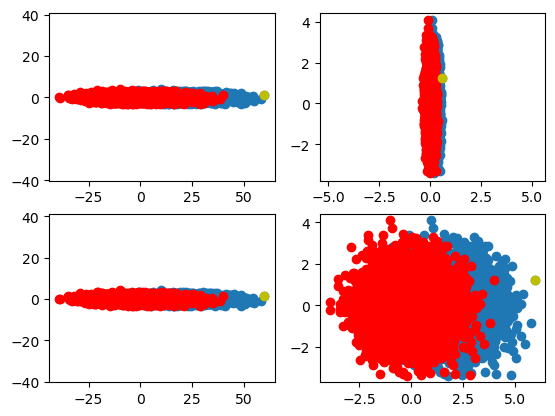

In [4]:
plt.subplot(2,2,1)
plt.scatter(test[:,0],test[:,1])
plt.scatter(testcent[:,0],testcent[:,1], color='r')
plt.scatter(test[point,0],test[point,1], color='y')
plt.axis('equal')

plt.subplot(2,2,2)
plt.scatter(testcov[:,0],testcov[:,1])
plt.scatter(testcovcent[:,0],testcovcent[:,1], color='r')
plt.scatter(testcov[point,0],testcov[point,1], color='y')
plt.axis('equal')

plt.subplot(2,2,3)
plt.scatter(testrotate[:,0],testrotate[:,1])
plt.scatter(testrotatecent[:,0],testrotatecent[:,1], color='r')
plt.scatter(testrotate[point,0],testrotate[point,1], color='y')
plt.axis('equal')

plt.subplot(2,2,4)
plt.scatter(testfinal[:,0],testfinal[:,1])
plt.scatter(testfinalcent[:,0],testfinalcent[:,1], color='r')
plt.scatter(testfinal[point,0],testfinal[point,1], color='y')
plt.axis('equal')

plt.show()

In [22]:
long = 10*np.random.randn(10000,1)+20
short = np.random.randn(10000,1)

test = np.concatenate([long, short],axis=1)
point = np.argsort(test[:,0])[-1]

covar = np.cov(test.T)
testrotate = np.dot(covar, test.T).T

In [25]:
test.T.shape

(2, 10000)

In [27]:
testrotate.shape, test.shape

((10000, 2), (10000, 2))

In [24]:
covar.shape

(2, 2)

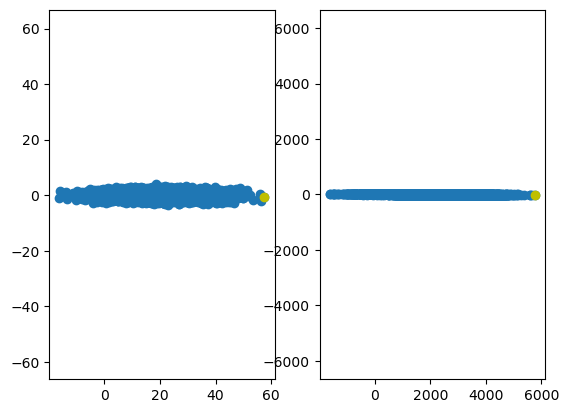

In [23]:
plt.subplot(1,2,1)
plt.scatter(test[:,0],test[:,1])
plt.scatter(test[point,0],test[point,1], color='y')
plt.axis('equal')

plt.subplot(1,2,2)
plt.scatter(testrotate[:,0],testrotate[:,1])
plt.scatter(testrotate[point,0],testrotate[point,1], color='y')
plt.axis('equal')
plt.show()

In [38]:
long1 = np.zeros([10000,1])
short1 = np.zeros([10000,1])

long2 = np.zeros([10000,1])
short2 = np.zeros([10000,1])

for i in np.arange(10000) :
    mult = 1+i*.01
    long1[i] = 10*np.random.randn(1,1)+2*mult
    short1[i] = 5*np.random.randn(1,1)+mult
    short2[i] = 10*np.random.randn(1,1)-2*mult
    long2[i] = 5*np.random.randn(1,1)+mult

test1 = np.concatenate([long1, short1],axis=1)
test2 = np.concatenate([long2, short2],axis=1)

covar1 = np.cov((test1 - np.mean(test1,axis=0)).T)
covinv = np.linalg.inv(covar1)
w1, v1 = np.linalg.eig(covar1)
s1 = w1**(-0.5)*v1

covar2 = np.cov((test2 - np.mean(test2,axis=0)).T)
w2, v2 = np.linalg.eig(covar2)
s2 = w2**(-0.5)*v2

In [41]:
testfinal1 = np.dot(s1, test1.T).T
testfinal2 = np.dot(s2, test2.T).T

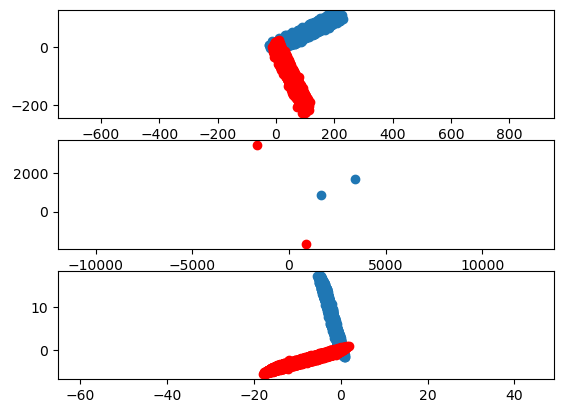

In [42]:
plt.subplot(3,1,1)
plt.scatter(test1[:,0],test1[:,1])
plt.scatter(test2[:,0],test2[:,1], color='r')
plt.axis('equal')

plt.subplot(3,1,2)
plt.scatter(covar1[:,0],covar1[:,1])
plt.scatter(covar2[:,0],covar2[:,1], color='r')
plt.axis('equal')

plt.subplot(3,1,3)
plt.scatter(testfinal1[:,0],testfinal1[:,1])
plt.scatter(testfinal2[:,0],testfinal2[:,1], color='r')
plt.axis('equal')

plt.show()

In [9]:
# Pickle = 'exp3_m3s1_c132.pkl'
# Pickle2 = 'exp3_m3s1_c142.pkl'
# cluster = pkl.load(open(Pickle,'rb'))['pcs']
# cluster = np.reshape(cluster, [cluster.shape[0], 24], order='F')
# cluster2 = pkl.load(open(Pickle2,'rb'))['pcs']
# cluster2 = np.reshape(cluster2, [cluster2.shape[0], 24], order='F')
# covar = np.cov(cluster.T)
# covinv = np.linalg.inv(covar)
# clusterinvcov = np.dot(cluster, covinv)
# 
# w, v = np.linalg.eig(covar)
# s = w**(-0.5)*v
# clusterrotate = np.dot(cluster, v)
# clusterfinal = np.dot(cluster, s)
# clusterfinal2 = np.dot(cluster2, s)

In [10]:
np.max(cluster2, axis=0) - np.min(cluster2, axis=0)

NameError: name 'cluster2' is not defined

In [11]:
np.max(cluster, axis=0) - np.min(cluster, axis=0)

NameError: name 'cluster' is not defined

In [12]:
np.argsort((np.max(cluster2, axis=0) - np.min(cluster2, axis=0)) - (np.max(cluster, axis=0) - np.min(cluster, axis=0)))

NameError: name 'cluster2' is not defined

In [13]:
inds = np.array([15,21])
dim = cluster[:,inds]
dim2 = cluster2[:,inds]
point = np.argsort(dim[:,0])[-1]
point2 = np.argsort(dim2[:,0])[-1]
diminv = clusterinvcov[:,inds]
dimrotate = clusterrotate[:,inds]
dimfinal = clusterfinal[:,inds]
dimfinal2 = clusterfinal2[:,inds]

NameError: name 'cluster' is not defined

NameError: name 'dim' is not defined

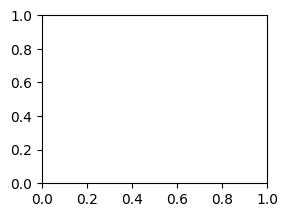

In [14]:
plt.subplot(2,2,1)
plt.scatter(dim[:,0],dim[:,1])
plt.scatter(dim[point,0],dim[point,1], color='y')
plt.scatter(dim2[:,0],dim2[:,1], color='r')
plt.scatter(dim2[point2,0],dim2[point2,1], color='y')
plt.axis('equal')
plt.subplot(2,2,2)
plt.scatter(diminv[:,0],diminv[:,1])
plt.scatter(diminv[point,0],diminv[point,1], color='y')
plt.axis('equal')
plt.subplot(2,2,3)
plt.scatter(dimrotate[:,0],dimrotate[:,1])
plt.scatter(dimrotate[point,0],dimrotate[point,1], color='y')
plt.axis('equal')
plt.subplot(2,2,4)
plt.scatter(dimfinal[:,0],dimfinal[:,1])
plt.scatter(dimfinal[point,0],dimfinal[point,1], color='y')
plt.scatter(dimfinal2[:,0],dimfinal2[:,1], color = 'r')
plt.scatter(dimfinal2[point2,0],dimfinal2[point2,1], color='y')
plt.axis('equal')
plt.show()

In [15]:
long1 = np.zeros([10000,1])
short1 = np.zeros([10000,1])
long2 = np.zeros([10000,1])
short2 = np.zeros([10000,1])
for i in np.arange(10000) :
    mult = 1+i*.005
    long1[i] = 10*np.random.randn(1,1)+2*mult
    short1[i] = 5*np.random.randn(1,1)+40
    short2[i] = 5*np.random.randn(1,1)-60
    long2[i] = 10*np.random.randn(1,1)+mult
test1 = np.concatenate([long1, long2],axis=1)
test2 = np.concatenate([short1, short2],axis=1)

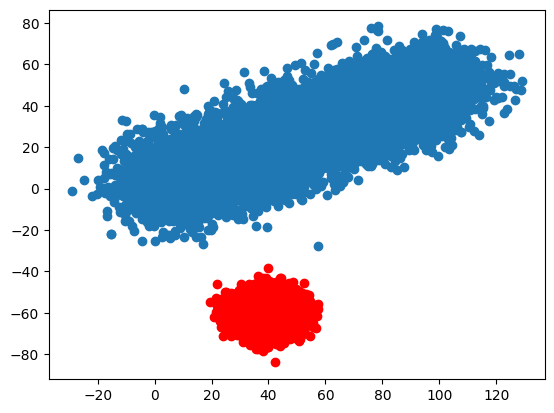

In [16]:
plt.scatter(test1[:,0], test1[:,1])
plt.scatter(test2[:,0], test2[:,1], color='r')
plt.show()